In [145]:
import pandas as pd
import numpy as np
import math
import random
import csv
from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
#from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import KFold
import time
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [146]:
#url = "C:/Users/GEM TEST II/Documents/pyt/PSO-SVM-Algorithm-master/PSO-SVM-Algorithm-master/PSO SVM ALGORITHM/australian.dat"
#colnames = ['x1', 'x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14', 'y']
#data = pd.read_csv(url,sep = ' ', header = None, names = colnames)
#X = data.drop('y', axis = 1)
#X =(X-X.mean())/X.std()
#y = data['y']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [147]:
#csv_result-1year   australian.dat  Polish1yeartrain
url = "Polish6yeartrain.csv"
#url = "C:/Users/GEM TEST II/Documents/pyt/PSO-SVM-Algorithm-master/PSO-SVM-Algorithm-master/PSO SVM ALGORITHM/Polish1yeartrain.csv"
#colnames = ['x1', 'x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14', 'y']
#colnames = ['x1', 'x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15', 'x16', 'x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29', 'x30', 'x31','x32','x33','x34','x35','x36','x37','x38','x39','x40','x41','x42','x43','x44','x45','x46','x47','x48','x49', 'x50','x51','x52','x53','x54','x55','x56','x57','x58','x59','x60','x61','x62','x63','x64','y']
colnames = ['x1', 'x2', 'x3','y']
data = pd.read_csv(url,header = None, names = colnames)

In [148]:
data.shape

(43401, 4)

In [149]:
data['y'].value_counts()

0    41310
1     2091
Name: y, dtype: int64

In [150]:
data['y'].value_counts()/np.float(len(data))

0    0.951821
1    0.048179
Name: y, dtype: float64

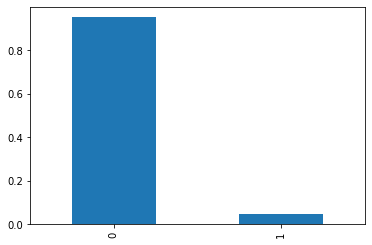

In [151]:
(data['y'].value_counts()/np.float(len(data))).plot.bar()

In [152]:
# declare feature vector and target variable

X = data.drop(['y'], axis=1)
y = data['y']

In [153]:
# import resample module 

from sklearn.utils import resample

In [154]:
# separate the minority and majority classes
df_majority = data[data['y']==0]
df_minority = data[data['y']==1]

In [155]:
# oversample minority class

df_minority_oversampled = resample(df_minority, replace=True, n_samples=43400, random_state=0)

In [156]:
# combine majority class with oversampled minority class

df_oversampled = pd.concat([df_majority, df_minority_oversampled])

In [157]:
# display new class value counts

df_oversampled['y'].value_counts()

1    43400
0    41310
Name: y, dtype: int64

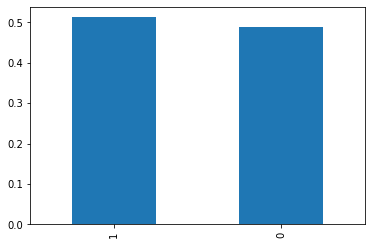

In [158]:
# view the distribution of percentages within the Class column


(df_oversampled['y'].value_counts()/np.float(len(df_oversampled))).plot.bar()

In [159]:
# declare feature vector and target variable
X1 = df_oversampled.drop(['y'], axis=1)
X1 =(X1-X1.mean())/X1.std()
y1 = df_oversampled['y']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20, random_state=42)

In [160]:
#################### I N P U T ####################
#berdasarkan buku
#khi = 0.729
#c1 = 2.05
#c2 = 2.05

#berdasarkan paper
K = 0.3
c1 = 2
c2 = 5
c = c1+ c2
khi = 2*K/(abs(2-c-math.sqrt(c**2-4*c)))
n_iterations = int(input("Inform the number of iterations: "))
n_particles = int(input("Inform the number of particles: "))

Inform the number of iterations: 10
Inform the number of particles: 10


In [161]:
#mencari nilai 0-1 loss dari tiap partikel
#partikle = (gamma,C) untuk rbf
#dt_classifier = DecisionTreeClassifier(random_state=42)
def fitness_function(position):
    #dt_classifier = DecisionTreeClassifier(random_state=42, gamma = position[0], C = position[1] )  
    dt_classifier = DecisionTreeClassifier(random_state=42)  
    dt_classifier.fit(X_train, y_train)
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    #Performance Metrics
    print("Training Findings")
    print("Accuracy:",accuracy_score(y_train,y_train_pred))  
    print("Confusion Matrix:",confusion_matrix(y_train,y_train_pred))
    print("Testing Findings")
    print("Accuracy:",accuracy_score(y_test, y_test_pred))
    print("Confusion Matrix:",confusion_matrix(y_test,y_test_pred))
    #Time
    start = time.time()
    #model.fit(X, y)
    dt_classifier.fit(X_train, y_train)
    dt_classifier.fit(X_test, y_test)
    stop = time.time()
    print(f"Training time: {stop - start}s")
    print(f"Test time: {stop - start}s")
    return (confusion_matrix(y_train,y_train_pred)[0][1] + confusion_matrix(y_train,y_train_pred)[1][0])/np.sum(confusion_matrix(y_train,y_train_pred)), (confusion_matrix(y_test,y_test_pred)[0][1] + confusion_matrix(y_test,y_test_pred)[1][0])/np.sum(confusion_matrix(y_test,y_test_pred))

#plotting (x axis = gamma, y axis = C)
def plot(position):
    x = []
    y = []
    for i in range(0,len(particle_position_vector)):
        x.append(particle_position_vector[i][0])
        y.append(particle_position_vector[i][1])
    colors = (0,0,0)
    plt.scatter(x, y, c = colors, alpha = 0.1)
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.axis([0,9,0,10])
    plt.gca().set_aspect('equal', adjustable='box')
    return plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


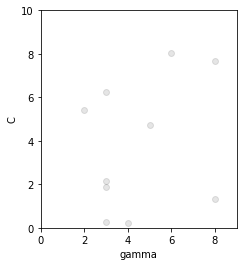

Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.3475661277770996s
Test time: 0.3475661277770996s
error of particle- 1 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [4.         0.20670628]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.3402576446533203s
Test time: 0.3402576446533203s
error of particle- 2 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [6.         8.02580464]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.3429269790649414s
Test time: 0.342926

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


 10 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [2.         5.43241993]


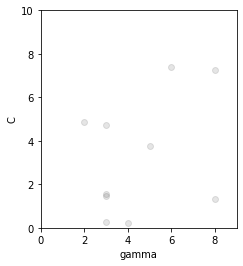

Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.3480410575866699s
Test time: 0.3480410575866699s
error of particle- 1 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [4.         0.20670628]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.3247973918914795s
Test time: 0.3247973918914795s
error of particle- 2 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [6.       7.399908]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.3438904285430908s
Test time: 0.3438904285

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


 10 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [2.         4.88634823]


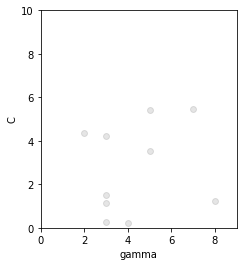

Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.3446693420410156s
Test time: 0.3446693420410156s
error of particle- 1 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [4.         0.20670628]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.3299417495727539s
Test time: 0.3299417495727539s
error of particle- 2 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [5.         5.41418218]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.33144688606262207s
Test time: 0.33144

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


 10 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [2.         4.36650706]


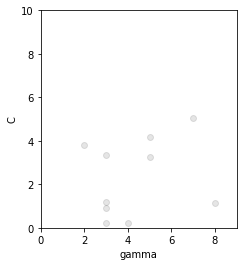

Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.3307814598083496s
Test time: 0.3307814598083496s
error of particle- 1 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [4.         0.20670628]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.33586955070495605s
Test time: 0.33586955070495605s
error of particle- 2 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [5.        4.1938266]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.3379335403442383s
Test time: 0.337933

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


 10 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [2.         3.80804045]


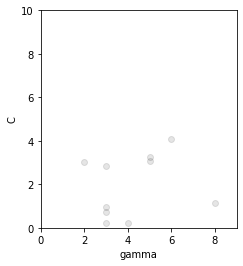

Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.34902143478393555s
Test time: 0.34902143478393555s
error of particle- 1 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [4.         0.20670628]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.38623547554016113s
Test time: 0.38623547554016113s
error of particle- 2 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [5.         3.07500989]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.34607362747192383s
Test time: 0.3

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


error of particle- 10 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [2.         3.04447706]


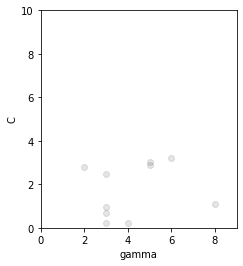

Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.43575334548950195s
Test time: 0.43575334548950195s
error of particle- 1 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [4.         0.20670628]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.42109107971191406s
Test time: 0.42109107971191406s
error of particle- 2 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [5.         2.86931863]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.4220924377441406s
Test time: 0.42

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


error of particle- 10 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [2.         2.80786364]


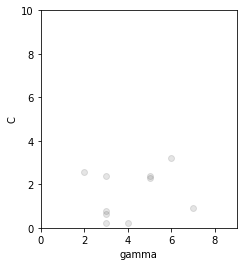

Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.43438053131103516s
Test time: 0.43438053131103516s
error of particle- 1 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [4.         0.20670628]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.718860387802124s
Test time: 0.718860387802124s
error of particle- 2 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [5.         2.36547346]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.5333809852600098s
Test time: 0.533380

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


 10 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [2.       2.570198]


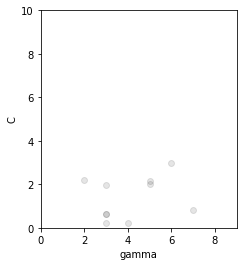

Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.3593869209289551s
Test time: 0.3593869209289551s
error of particle- 1 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [4.         0.20670628]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.34375977516174316s
Test time: 0.34375977516174316s
error of particle- 2 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [5.         2.01666437]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.3593771457672119s
Test time: 0.3593

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


 10 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [2.         2.19620039]


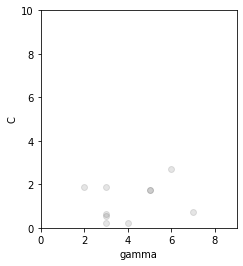

Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.3593909740447998s
Test time: 0.3593909740447998s
error of particle- 1 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [4.         0.20670628]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.3437626361846924s
Test time: 0.3437626361846924s
error of particle- 2 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [5.         1.75842408]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.3281362056732178s
Test time: 0.328136

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


 10 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [2.         1.89583691]


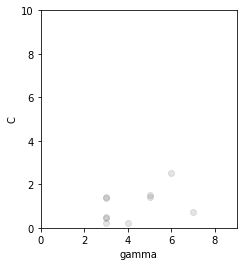

Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.3418848514556885s
Test time: 0.3418848514556885s
error of particle- 1 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [4.         0.20670628]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.3408823013305664s
Test time: 0.3408823013305664s
error of particle- 2 is (training, test) (0.0009739109904379649, 0.029571479164207295)  At (gamma, c):  [5.         1.43840475]
Training Findings
Accuracy: 0.999026089009562
Confusion Matrix: [[32966    66]
 [    0 34736]]
Testing Findings
Accuracy: 0.9704285208357927
Confusion Matrix: [[7777  501]
 [   0 8664]]
Training time: 0.3408823013305664s
Test time: 0.340882

In [162]:
particle_position_vector = np.array([np.array([random.randint(1,8), random.random()*10]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
gbest_fitness_value = np.array([float('inf'), float('inf')])
gbest_position = np.array([float('inf'), float('inf')])

velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0
while iteration < n_iterations:
    plot(particle_position_vector)
    for i in range(n_particles):
        fitness_cadidate = fitness_function(particle_position_vector[i])
        print("error of particle-",i+1,"is (training, test)", fitness_cadidate, " At (gamma, c): ", particle_position_vector[i])
        
        if(pbest_fitness_value[i] > fitness_cadidate[1]):
            pbest_fitness_value[i] = fitness_cadidate[1]
            pbest_position[i] = particle_position_vector[i]

        if(gbest_fitness_value[1] > fitness_cadidate[1]):
            gbest_fitness_value = fitness_cadidate
            gbest_position = particle_position_vector[i]
        elif(gbest_fitness_value[1] == fitness_cadidate[1] and gbest_fitness_value[0] > fitness_cadidate[0]):
            gbest_fitness_value = fitness_cadidate
            gbest_position = particle_position_vector[i]
            
    for i in range(n_particles):
        #(gamma,C)
        max_velocity = np.array([8,10])
        min_velocity = np.array([-8,-10])
        max_position = np.array([8,10])
        min_position = np.array([1, 0.001])
        new_velocity = khi*(velocity_vector[i] + (c1*random.randint(0,3)) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position-particle_position_vector[i]))
        new_velocity[0] = np.round(new_velocity[0])
        for j in range(0,len(new_velocity)):
            if(new_velocity[j] > max_velocity[j]):
                new_velocity[j] = max_velocity[j]
            elif(new_velocity[j] < min_velocity[j]):
                new_velocity[j] = min_velocity[j]
            
        new_position = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = new_position
        for j in range(0,2):
            if(particle_position_vector[i][j] > max_position[j]):
                particle_position_vector[i][j] = max_position[j]
            elif(particle_position_vector[i][j] < min_position[j]):
                particle_position_vector[i][j] = min_position[j]
    
    iteration = iteration + 1
    
print("The best position is ", gbest_position, "in iteration number", iteration, "with error rate (train, test):", fitness_function(gbest_position))
#Performance Metrics
#dt_classifier = DecisionTreeClassifier(random_state=42)  
#dt_classifier.fit(X_train, y_train)
#y_train_pred = dt_classifier.predict(X_train)
#y_test_pred = dt_classifier.predict(X_test) 
    
